# Introduction to Data Analytics

In [1]:
# Dependencies
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
csv = files.upload()
for fn in csv.keys():
  file = fn

Saving Cancer_Data.csv to Cancer_Data (2).csv


In [3]:
df = pd.read_csv(file)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print(f'Dimensions of the Cancer Data Set: {df.shape}')

Dimensions of the Cancer Data Set: (569, 33)


The column that we need to predict is the diagnosis column, which is labeled with M, for malignant, and B for Benign. 

In [5]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [6]:
# Check for null values
df.isnull().sum()
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
label_encoder = preprocessing.LabelEncoder()
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Looking at the dataset's states before and after the label encoding, we can see that malignant tumours were assigned with 1, and benign tumours were assigned with 0. 

Let's get a look of how many tumours are malignant, and how many are benign. 

In [9]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

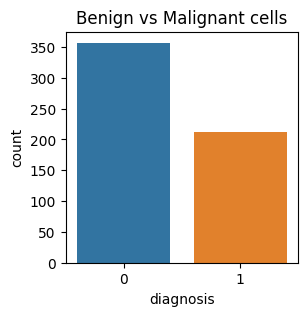

In [10]:
plt.figure(figsize=(3,3))
ax = sns.countplot(data=df, x='diagnosis').set_title('Benign vs Malignant cells')

From this plot, we can see that the dataset consists of a higher number of benign tumours compared to malignant tumours. 

In [11]:
x,y=df['diagnosis'].value_counts()
print(f'There are {x-y} more benign cells than malignant cells.')

There are 145 more benign cells than malignant cells.


Looking at the entire dataset with it's features can be quite overwhelming, so let us take a small section of the database to analyse its attributes. 

In [12]:
df_select = df.iloc[:, 1:7]
df_select.head(n = 10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,1,17.99,10.38,122.80,1001.0,0.11840
1,1,20.57,17.77,132.90,1326.0,0.08474
2,1,19.69,21.25,130.00,1203.0,0.10960
3,1,11.42,20.38,77.58,386.1,0.14250
4,1,20.29,14.34,135.10,1297.0,0.10030
5,1,12.45,15.70,82.57,477.1,0.12780
6,1,18.25,19.98,119.60,1040.0,0.09463
7,1,13.71,20.83,90.20,577.9,0.11890
8,1,13.00,21.82,87.50,519.8,0.12730
9,1,12.46,24.04,83.97,475.9,0.11860


We can use a pair plot to get a graphical look at our data, which helps us to easily notice patterns one might overlook while looking at a tabular representation of our data.

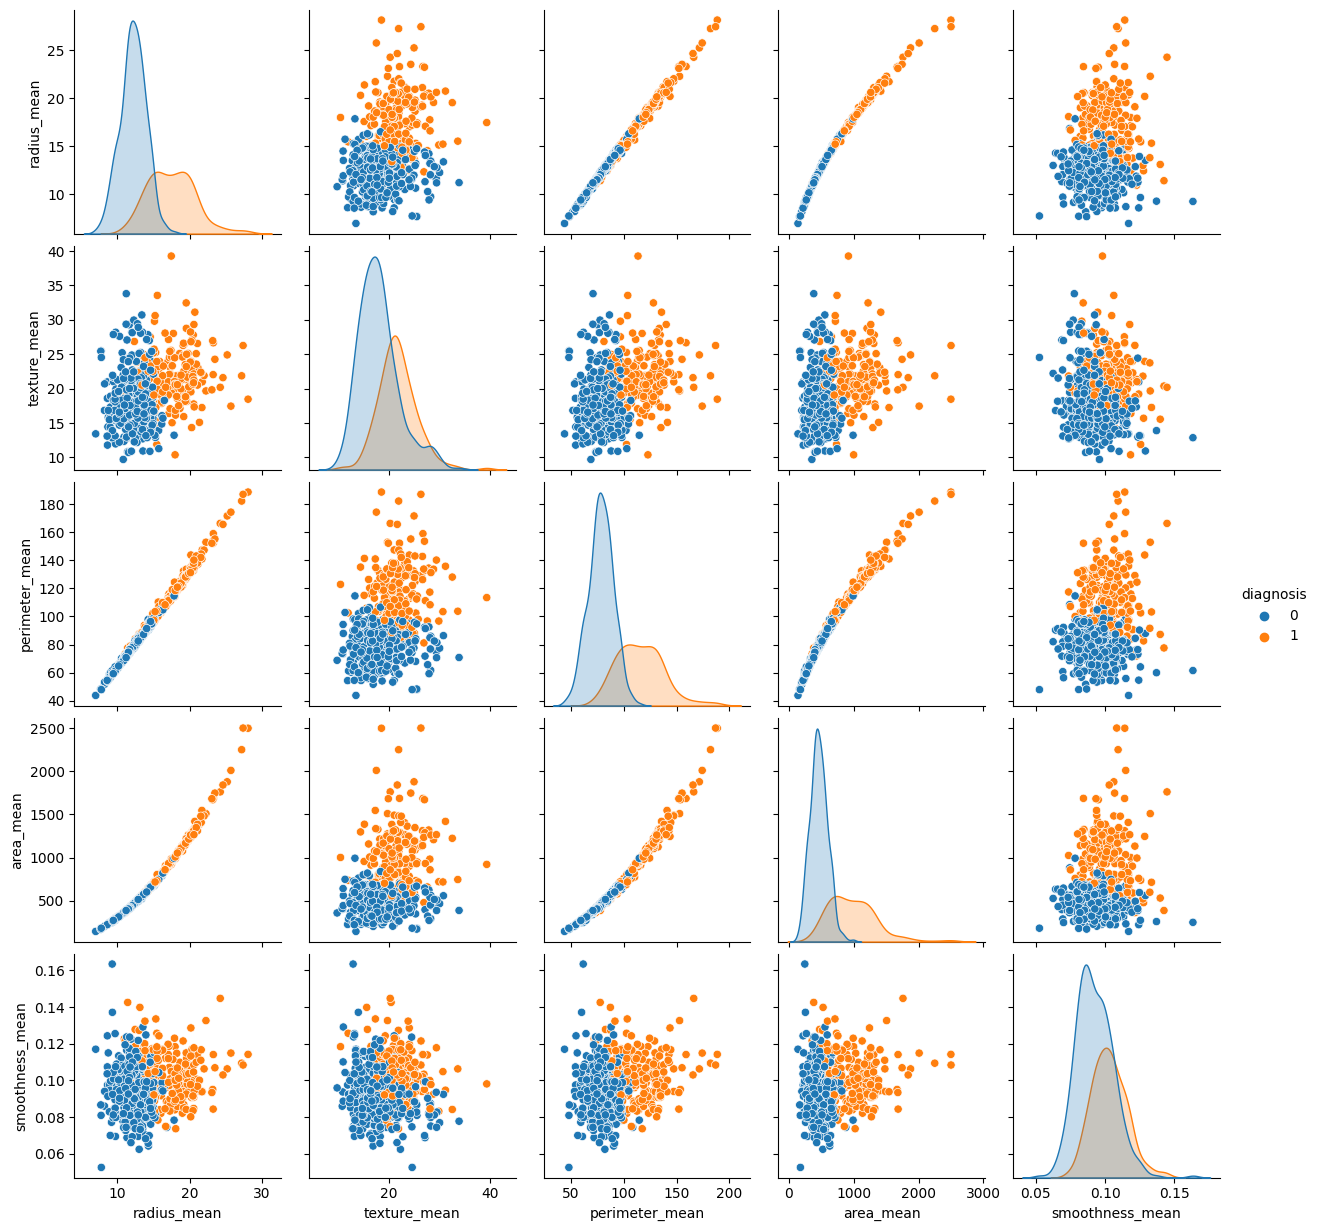

In [13]:
sns.pairplot(df_select, hue = 'diagnosis')

From the pair plot, we see certain features that have correlation like ```area_mean``` and ```radius_mean```. This is obvious, as area is proportional to the square of the radius. Similar arguments can be made for features like  ```perimeter_mean``` and ```radius_mean```. 

The plots that pique our interest are those that have a certain amount of clustering, for example, the plot of ```radius_mean``` vs ```texture_mean```. Lets take a look at this plot in much closer detail.

Text(0.5, 1.0, 'Malignant vs Benign Cells')

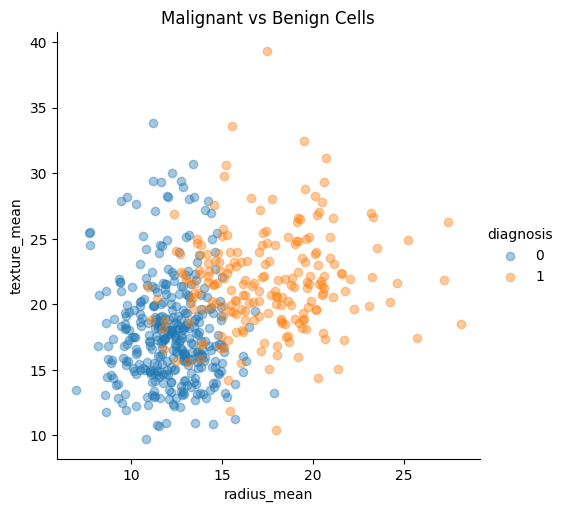

In [14]:
sns.lmplot(x='radius_mean', y='texture_mean', hue = 'diagnosis', data = df, fit_reg = False, scatter_kws={'alpha': 0.4})
plt.title('Malignant vs Benign Cells')

From this plot, we can see that there is a clustering according to the diagnosis. we can also see certain things that are not visible at first glance, for example, the fact that Malignant cells have a much higher radius compared to the Benign cells.  In such a scenario, one could use a simple classifying algorithm like logistic regression to classify the various tumours into benign and malignant. 



A good suplement to using a pair plot is using a heatmap which is plotted using a correlation matrix. In this plot, features with higher correlation are plotted using a darker colour relative to a colourbar. This allows us to find features that are heavily dependent on each other. 

<Axes: >

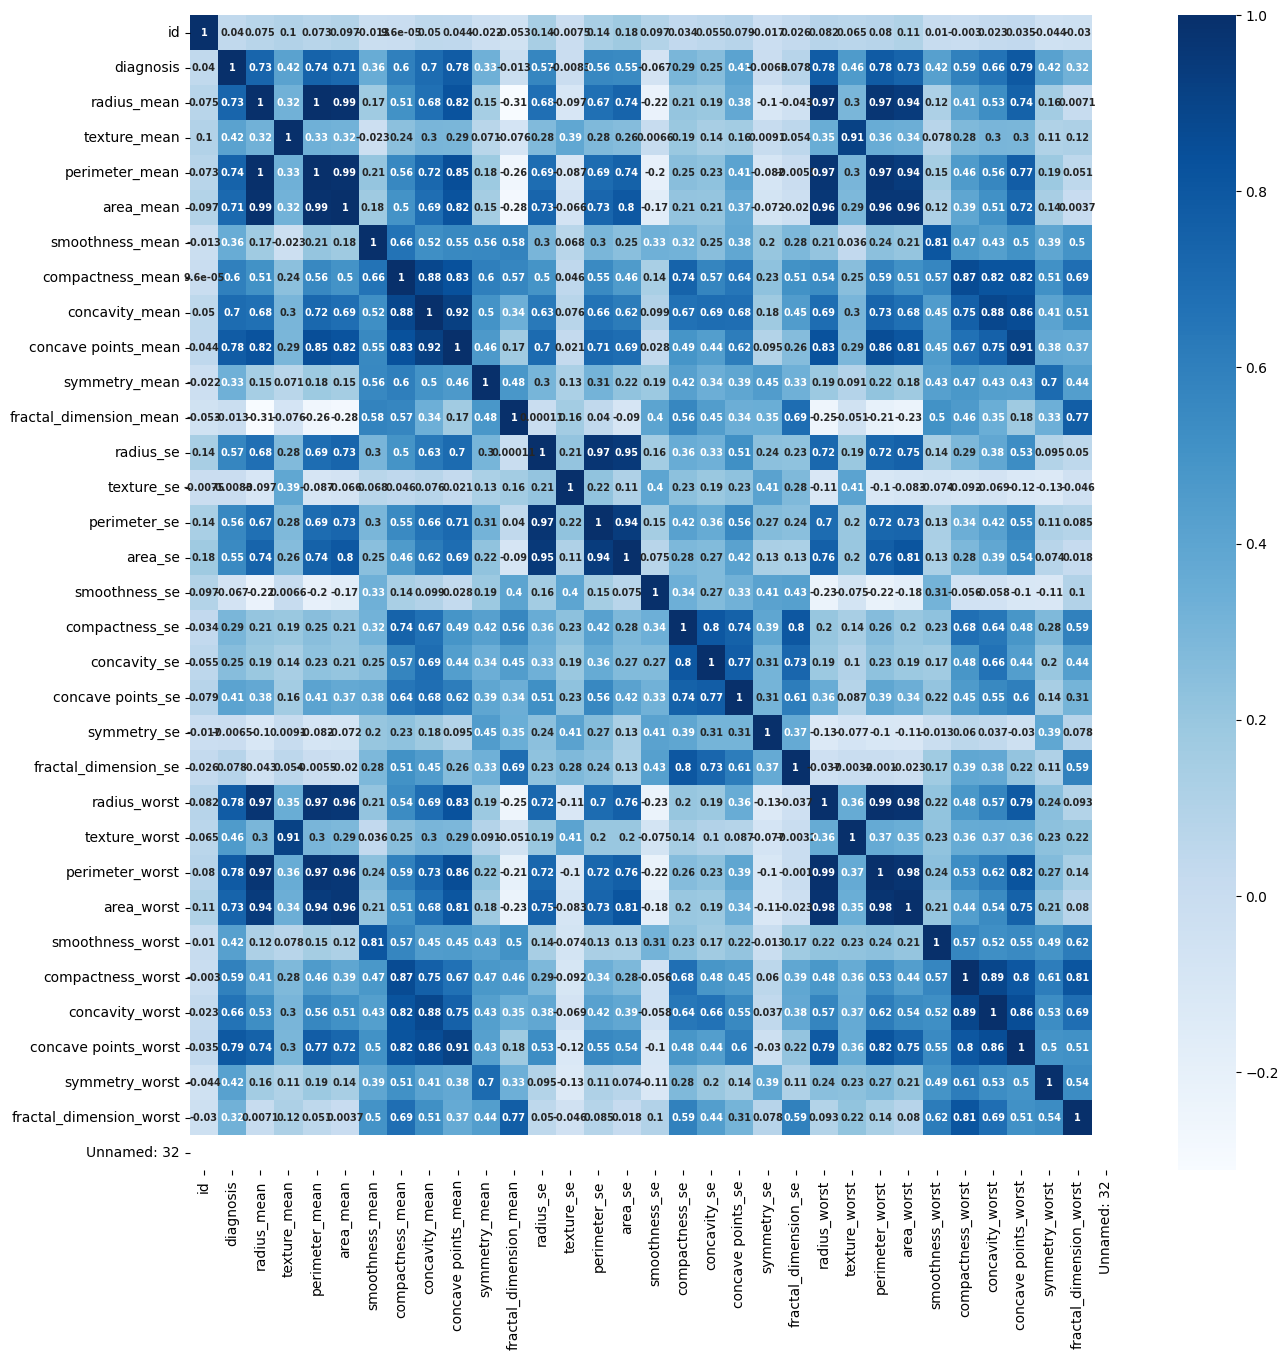

In [15]:
# See correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cbar=True,annot=True, annot_kws={'fontsize':7, 'fontweight':'bold'},cmap='Blues')

In [16]:
# Drop column that is not needed
df = df.drop(labels="Unnamed: 32", axis=1)
df = df.drop(labels="id", axis=1)

In [17]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
df.shape

(569, 31)

## Split the Data into training and testing sets

In [19]:
X, y = df.drop('diagnosis', axis=1), df[['diagnosis']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=43, stratify=y)

## Train the model on the data

In [20]:
classifier = LogisticRegression(random_state=42)
predictor = classifier.fit(X_train, y_train)
y_pred = predictor.predict(X_val)
accuracy_log_reg = accuracy_score(y_val, y_pred)
print(f'The accuracy of the logistic regression classifier is {accuracy_log_reg}')

The accuracy of the logistic regression classifier is 0.9627659574468085


This is a look on how our classifier would look visualised for the features od radius_mean and texture_mean

![logistic_regression.png](https://www.kaggleusercontent.com/kf/1950086/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..T1xVOJ0bz0piGWKIA4MB-w.ruL_neZ4r45VUtxrI5wMsJPLYNsLPDgmuxCcjXDWZh5PANqmfd3aXsqXCry3Y9kUDikupfosdOT2mEiVumdpH7iwqJtINNKOSNKiohD-bCpBsDR2v3w6e4OjOhBVaAHONFi8NIbC54F6tOAsn6894kNNdN0Yk4OfE-OKcNjZRbfPKQuK5WkepKjLmmXl7_diOmqPdJ0-rn6HUylRmJH06iPLKj509dTvJQ7Z6CF_N0s7X36Hl9G_Ju-ae1Tab6ZxQMODmce622-o2eZ_0G_1rzst3kOX4JPqRmjnbvzPJieIdfJq_Qwr_1AFFxhInW1sZr_Q3kXNRlkQ2q9exZAyHZyQn2jm1mKOyt7NSZUNH4clFXIKL0YOJcGiShXKCYCZKdD1SIJTd3Jo9SSR3_g3wFicF0_XnbCJcT5TJ9nMTTbDWgScgFOKDjbkCUHuVWvVX-HKJP6BbaerJ5gn6u5XbnOKwhki41I4YuYWUpcc4UIMSS3qmdYb5SpT0vFUTzhNFO6_sw_Do6ORZFDIv-XH4pHlrYRGbqechQjILoIvPK_3N3lI4oC_V7IR909qPARmtU9QMmr7JcJFV_eHQ4fBgqEzmJmMtGMSEfhj9pXh5wnyqkTfEvMKnzUCs6UT5XMM9YPqLBOP5Q8rAKb_9wl3H7EGsvEe9yIrRIdYM6Im3_k.-ZX9Q3mm3uKqp-7DbhH7_Q/__results___files/__results___30_0.png)

## References


-   https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3
-   https://realpython.com/train-test-split-python-data/
- https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
- https://www.kaggle.com/code/guhbrandao/cancer-classification-97-accuracy#Data-Cleaning,-Correcting,-Completing-and-Converting
- https://www.kaggle.com/code/nathdip/analysis-of-diagnosis-data